# Breast Cancer Prediction Wisconsin Data Set

This is a side project of analyzing of the Breast Cancer Wisconsin (Diagnostic) DataSet, obtained from Kaggle. I are going to try two different machine learning classification models to compare the results. I've divided my presentation into two sections.

## Data preprocessing
## Applying machine learning models





# 1. Data preprocessing

Let’s start by exploring the data.

In [2]:
import pandas as pd
# read the file
df = pd.read_csv("/Users/jiezhao/Downloads/data.csv")
# print the columns name of dataset
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [3]:
# check the data set
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797.8   
11   84610002         M       15.780         17.89          103.60      781.0   
12     846226         M       19.170         24.80          132.40     1123.0   
13     846381         M       15.850         23.95          103.70      782.7   
14   84667401         M       13.730         22.61           93.60      578.3   
15   84799002         M       14.540         27.54           96.73      658.8   
16     848406         M       14.680         20.13           94.74      684.5   
17   84862001         M       16.130         20.68          108.10      798.8   
18     849014         M       19.810         22.15          130.00     1260.0   
19    8510426         B       13.540         14.36           87.46      566.3   
20    8510653         B       13.080         15.71           85.63      520.0   
21    8510824         B        9.504         12.44           60.34      273.9   
22    8511133         M       15.340         14.26          102.50      704.4   
23     851509         M       21.160         23.04          137.20     1404.0   
24     852552         M       16.650         21.38          110.00      904.6   
25     852631         M       17.140         16.40          116.00      912.7   
26     852763         M       14.580         21.53           97.41      644.8   
27     852781         M       18.610         20.25          122.10     1094.0   
28     852973         M       15.300         25.27          102.40      732.4   
29     853201         M       17.570         15.05          115.00      955.1   
..        ...       ...          ...           ...             ...        ...   
539    921362         B        7.691         25.44           48.34      170.4   
540    921385         B       11.540         14.44           74.65      402.9   
541    921386         B       14.470         24.99           95.81      656.4   
542    921644         B       14.740         25.42           94.70      668.6   
543    922296         B       13.210         28.06           84.88      538.4   
544    922297         B       13.870         20.70           89.77      584.8   
545    922576         B       13.620         23.23           87.19      573.2   
546    922577         B       10.320         16.35           65.31      324.9   
547    922840         B       10.260         16.58           65.85      320.8   
548    923169         B        9.683         19.34           61.05      285.7   
549    923465         B       10.820         24.21           68.89      361.6   
550    923748         B       10.860         21.48           68.51      360.5   
551    923780         B       11.130         22.44           71.49      378.4   
552    924084         B       12.770         29.43           81.35      507.9   
553    924342         B        9.333         21.94           59.01      264.0   
554    924632         B       12.880         28.92           82.50      514.3   
555    924934         B       10.290         27.61           65.67      321.4   
556    924964         B       10.160      

In [3]:

# find whether there exist missing value in any columns
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
# clearly the last columns are almost all missing value, we are going to drop it
# df.dropna()     #drop all rows that have any NaN values
# df.dropna(how='all')     #Drop rows where all cells in that row is NA
#df.drop('id',axis=1,inplace=True)
#df.drop('Unnamed: 32',axis=1,inplace=True)
df1=df.copy();
df1=df1.iloc[:,1:32];
df1['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
#df1.columns = list(df.iloc[:,1:32].columns)


In [5]:
df1.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean           ...             radius_worst  texture_worst  \
0         0.2419           ...                    25.38          17.33   
1         0.1812           ...                    24.99          23.41   
2         0.2069           ...                    23.57          25.53   
3         0.2597           ...                    14.91          26.50   
4         0.1809           ...                    22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 31 columns]

From above we can see, except the "diagnosis", all other features are numerical value(float) range huge differently. To effeciently modeling the data, I am going to rescale the data.

In [6]:
from sklearn import preprocessing

df2=pd.DataFrame(preprocessing.scale(df1.iloc[:,0:31]));
df2.columns = list(df1.iloc[:,0:31].columns)
df2['diagnosis'] = df1['diagnosis']

df2.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     1.097064     -2.073335        1.269934   0.984375   
1          1     1.829821     -0.353632        1.685955   1.908708   
2          1     1.579888      0.456187        1.566503   1.558884   
3          1    -0.768909      0.253732       -0.592687  -0.764464   
4          1     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean           ...             radius_worst  texture_worst  \
0       2.217515           ...                 1.886690      -1.359293   
1       0.001392           ...                 1.805927      -0.369203   
2       0.939685           ...                 1.511870      -0.023974   
3       2.867383           ...                -0.281464       0.133984   
4      -0.009560           ...                 1.298575      -1.466770   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0         2.303601    2.001237          1.307686           2.616665   
1         1.535126    1.890489         -0.375612          -0.430444   
2         1.347475    1.456285          0.527407           1.082932   
3        -0.249939   -0.550021          3.394275           3.893397   
4         1.338539    1.220724          0.220556          -0.313395   

   concavity_worst  concave points_worst  symmetry_worst  \
0         2.109526              2.296076        2.750622   
1        -0.146749              1.087084       -0.243890   
2         0.854974              1.955000        1.152255   
3         1.989588              2.175786        6.046041   
4         0.613179              0.729259       -0.868353   

   fractal_dimension_worst  
0                 1.937015  
1                 0.281190  
2                 0.201391  
3                 4.935010  
4                -0.397100  

[5 rows x 31 columns]

Now lets check the correlation between features so that we can remove multicolinearity if it exists.

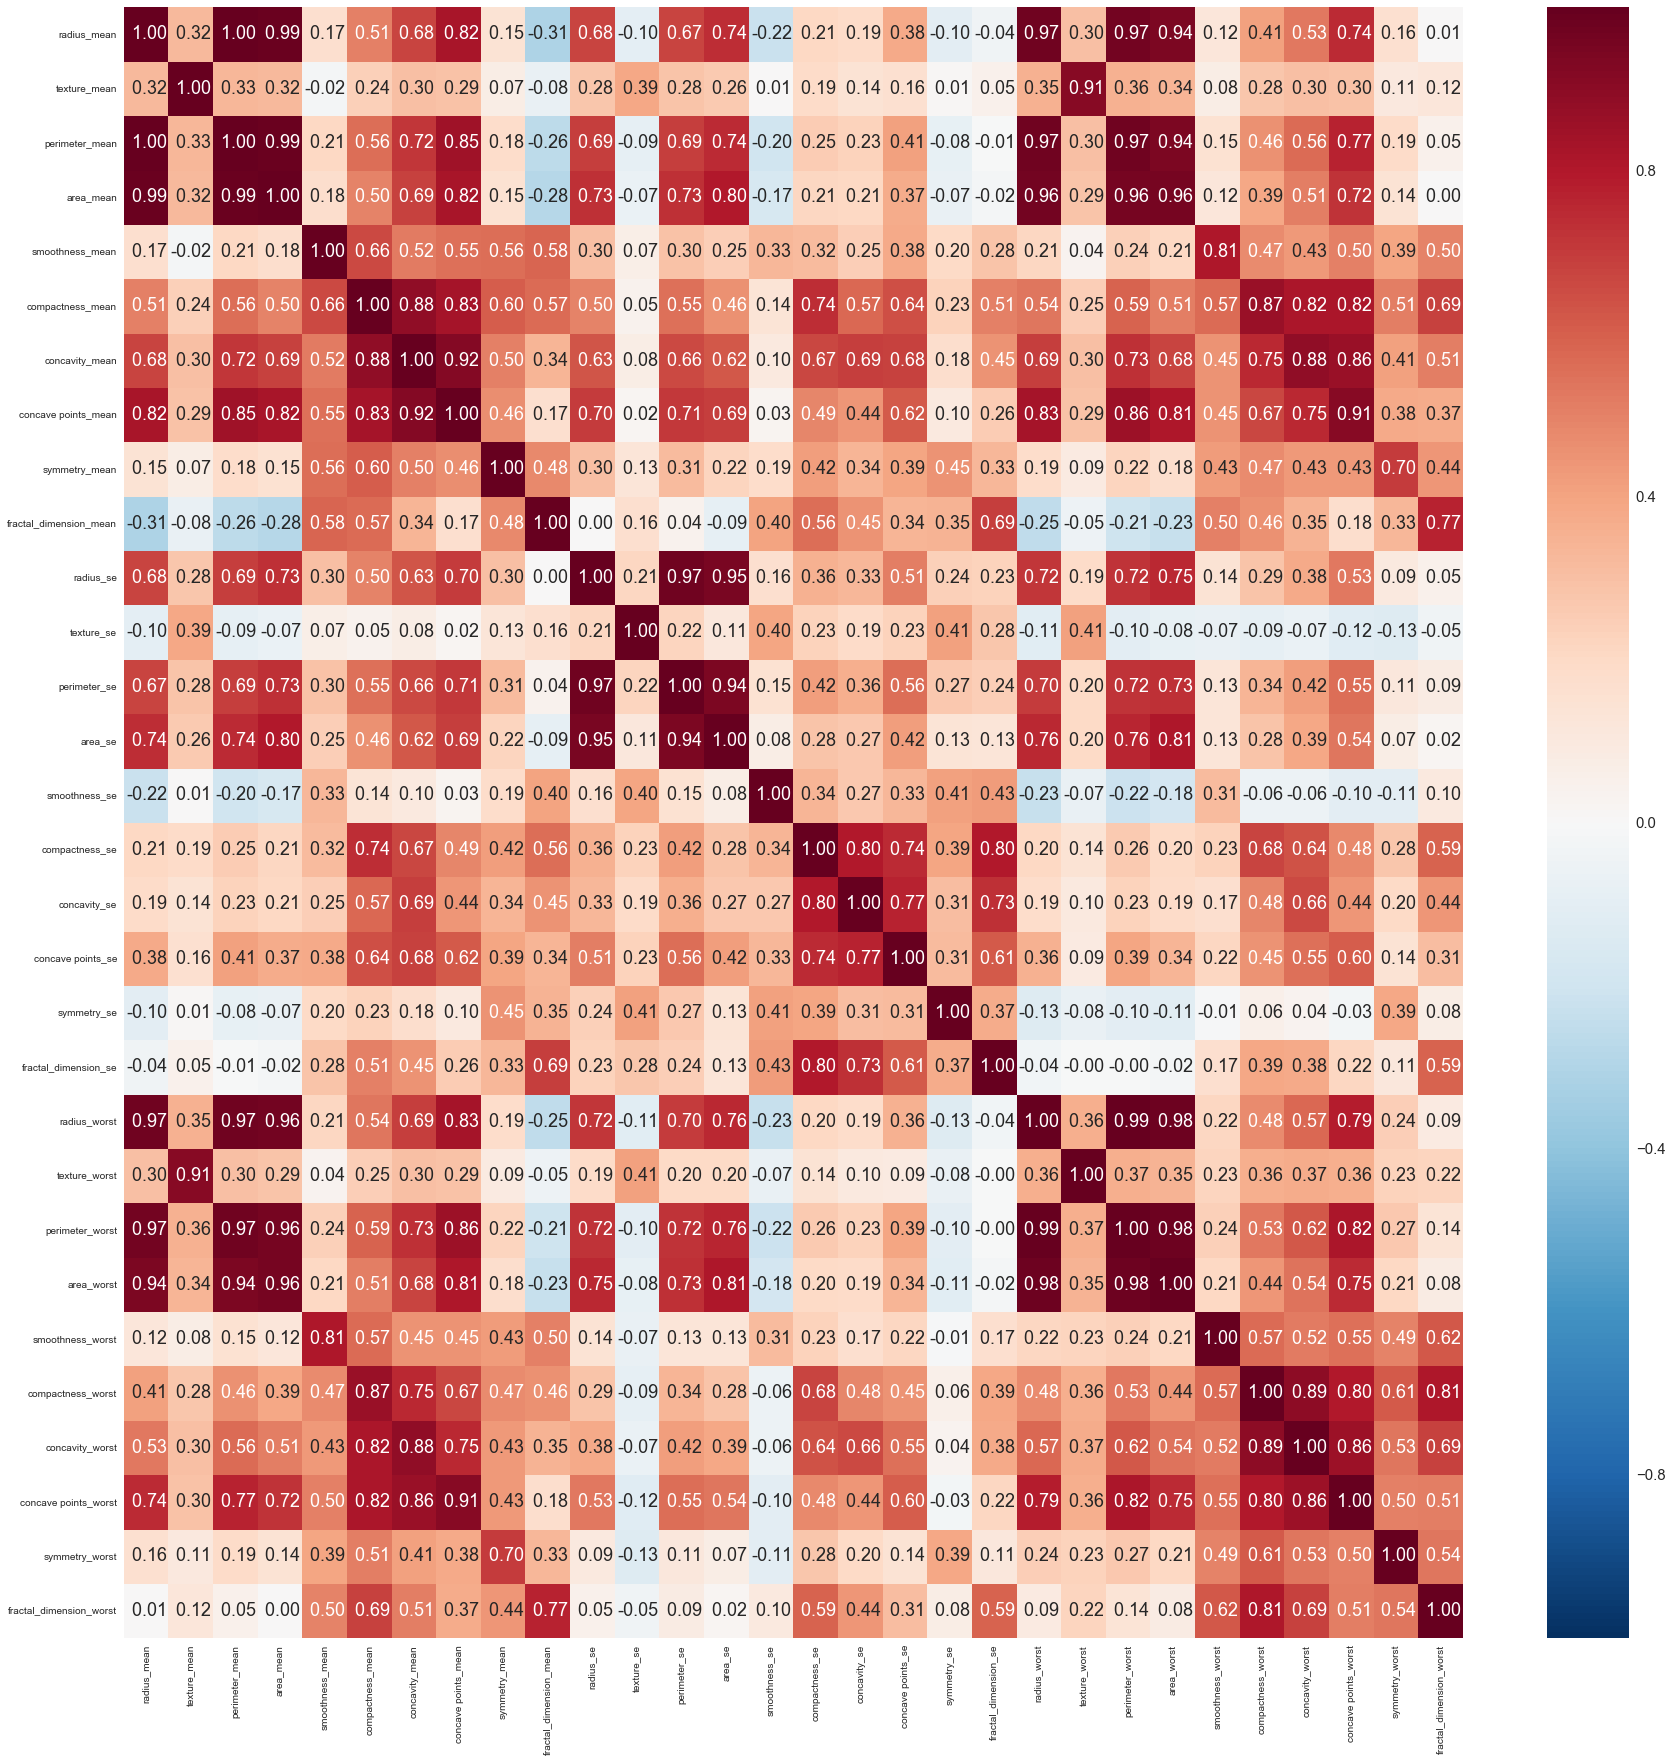

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,30)) 
sns.set(font_scale=1.5)
sns.heatmap(df2.iloc[:,1:31].corr(),cbar=True,fmt =' .2f', annot=True)

#xticklabels= df2, yticklabels= df2,
     
sns.plt.show()

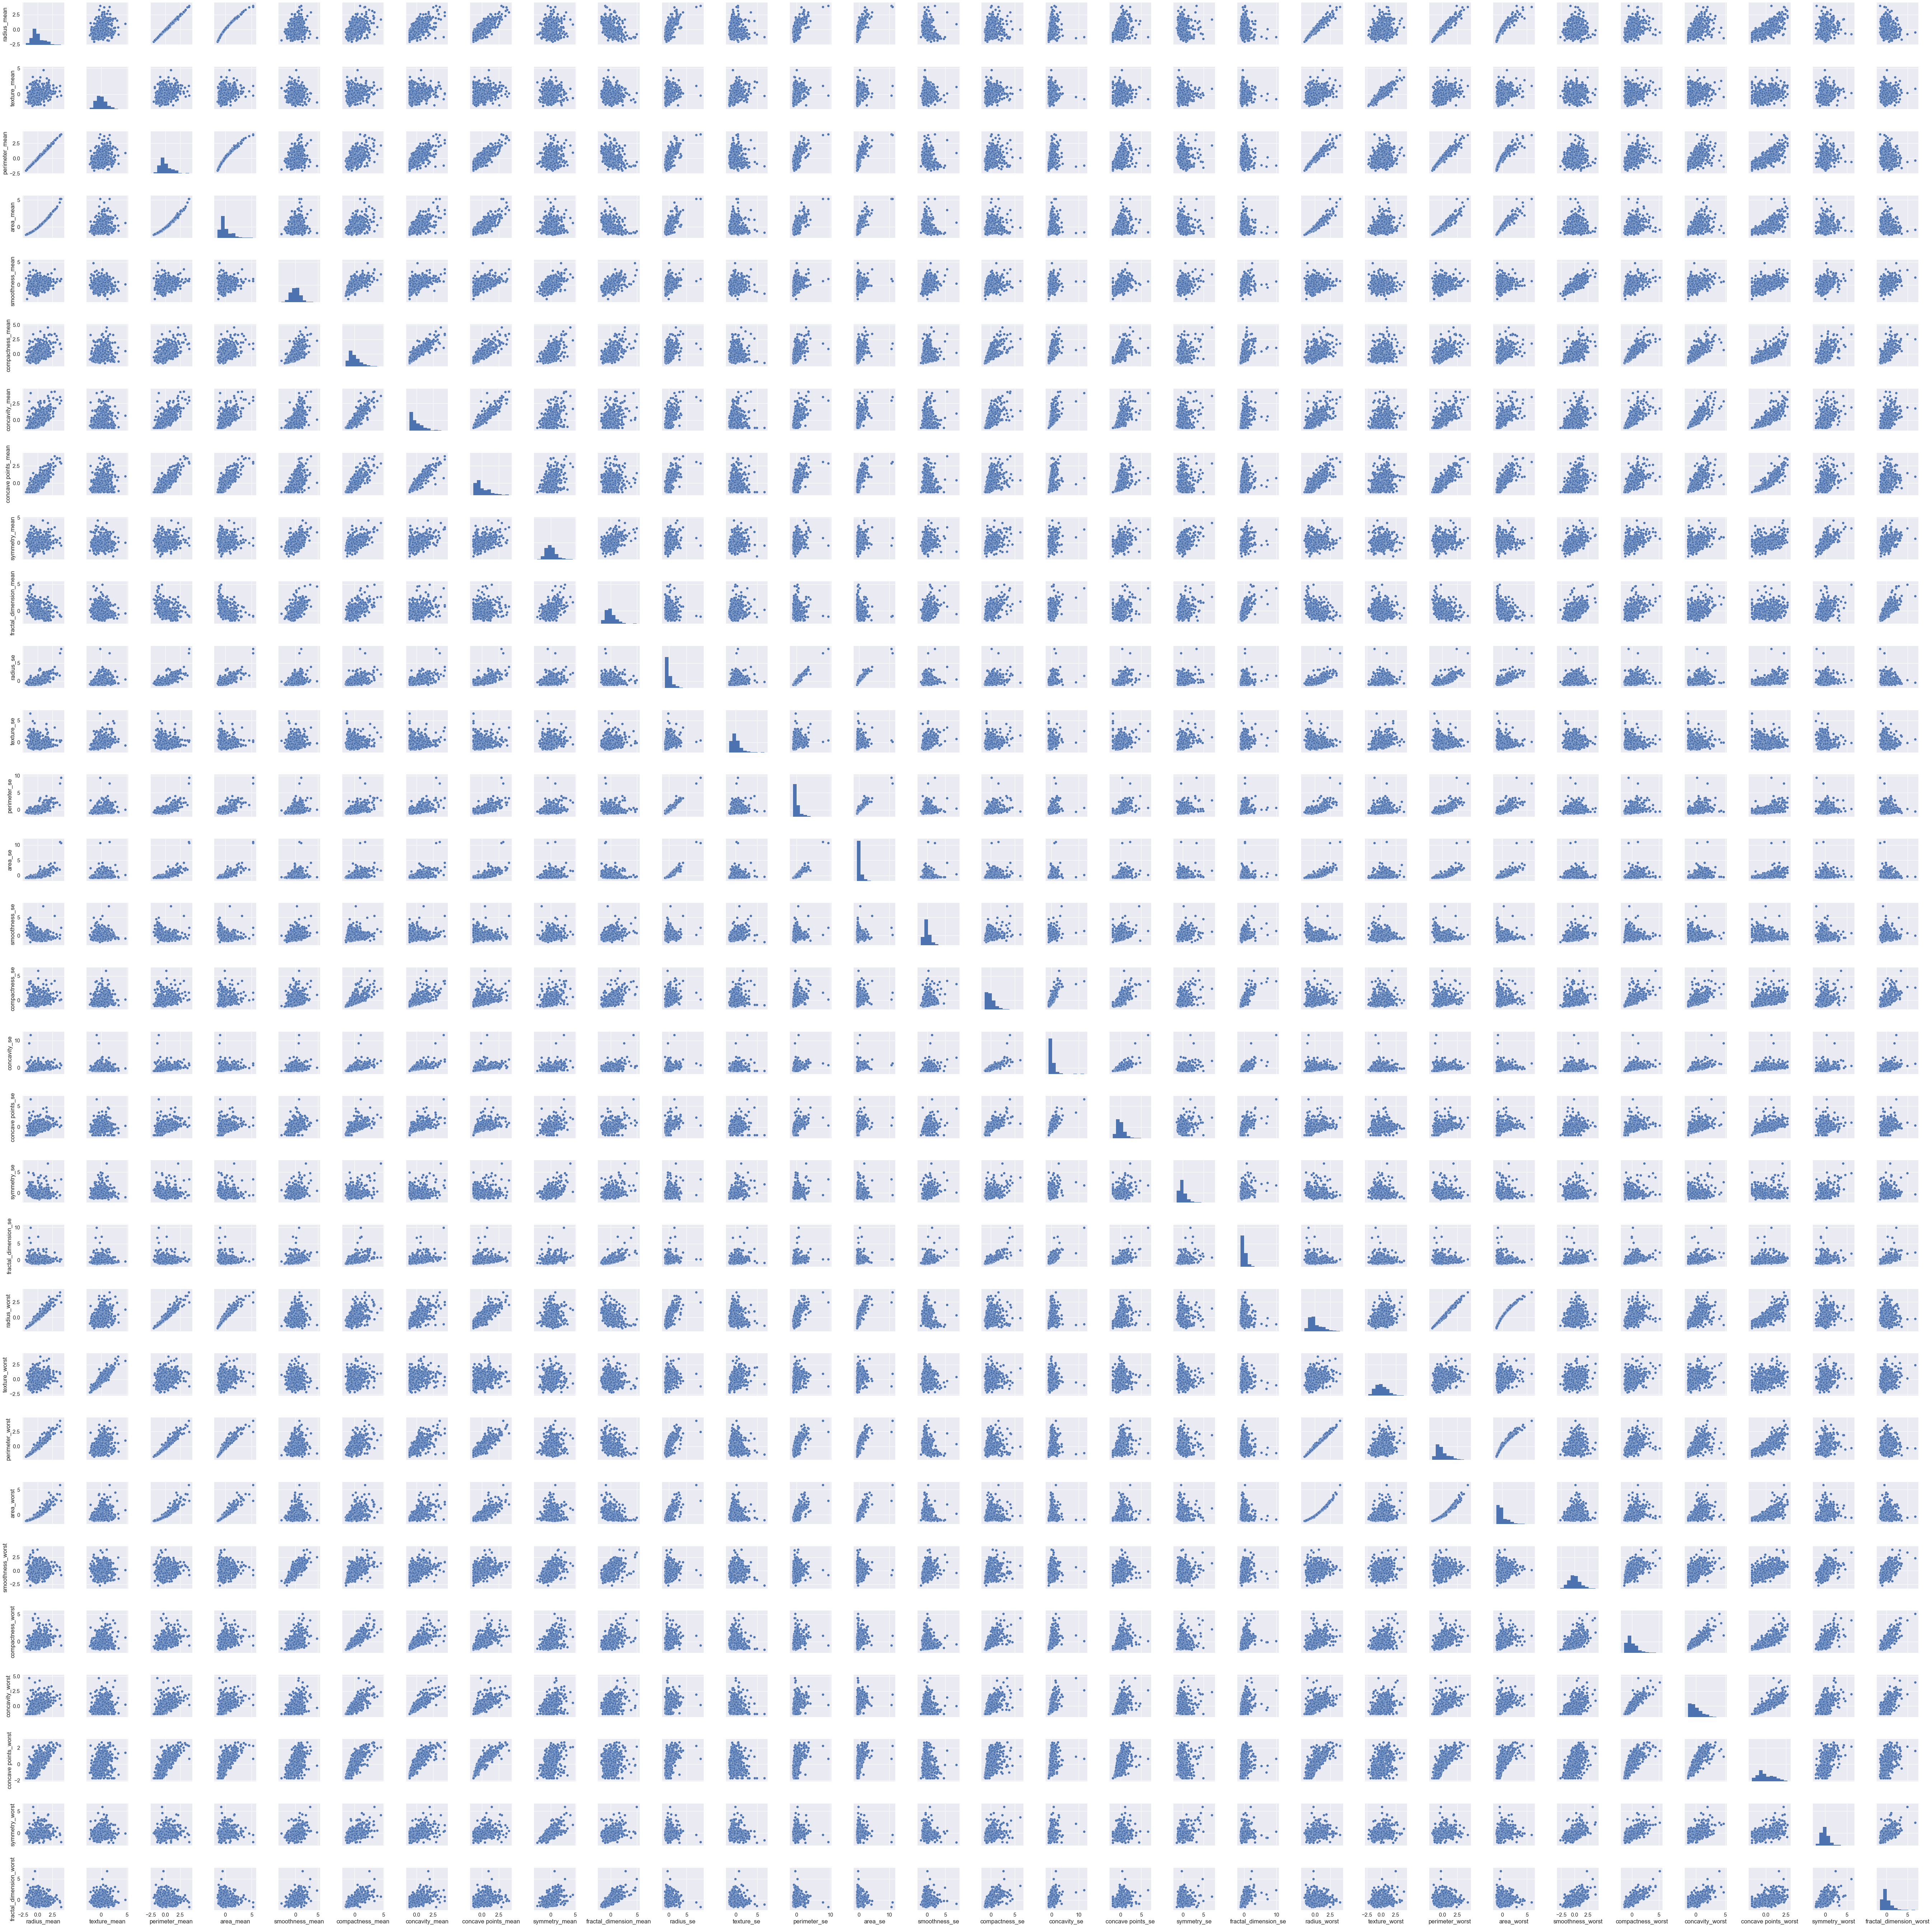

In [8]:
sns.pairplot(df2.iloc[:,1:31])
sns.plt.show()

Clearly, there exists strong colinearity between some features. For example, the highest correlations are between:
1. perimeter_mean,area_mean and radius_mean. 
2. perimeter_worst,area_worst and radius_worst;
3. perimeter_se,area_se and radius_se.

This multicolinearity could cause machine learning models fail. To reduce it, we use PCA. 

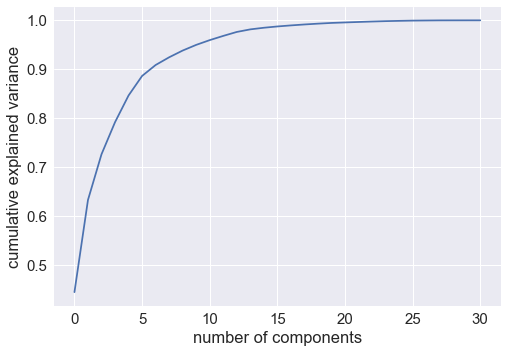

In [9]:
from sklearn.decomposition import PCA
import numpy as np
# determine how many components are needed to describe the data
pca = PCA().fit(df2.iloc[:,0:31])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [12]:
pca=PCA(n_components=0.9)
pcanew=pca.fit_transform(df2.iloc[:,0:31])
print (pcanew.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())

pca=PCA(n_components=0.95)
pcanew=pca.fit_transform(df2.iloc[:,1:31])
print (pcanew.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())


(569, 7)
[ 0.444103    0.18851848  0.0934184   0.06563924  0.05460987  0.03993509
  0.02238485]
0.908608940042
(569, 10)
[ 0.44272026  0.18971182  0.09393163  0.06602135  0.05495768  0.04024522
  0.02250734  0.01588724  0.01389649  0.01168978]
0.951568814337


Therefore, to explain over 90% of the variance, we need to include the first 7 components; to explain over 95% of the variance, we need the first 11 components. 

## 2. Applying machine learning models

### a. Logistic Regression

(569, 10)
(569, 1)
(569, 10)
score Scikit learn:  0.965034965035
Logistic Regression:
confusion matrix
 [[89  1]
 [ 4 49]] 


Confusion matrix plot of Logistic regression


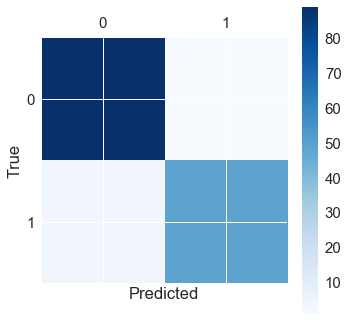


 Classification report 
              precision    recall  f1-score   support

          0       0.96      0.99      0.97        90
          1       0.98      0.92      0.95        53

avg / total       0.97      0.97      0.96       143



In [42]:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


y= df2.iloc[:,0:1].as_matrix();
print(pcanew.shape)
print(y.shape)
dfnew=pd.DataFrame(np.hstack((pcanew,y)));
X=pcanew;
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y)); 

# train scikit learn model 
clf = LogisticRegression()
clf.fit(X_train,y_train)
#print ('score Scikit learn: ', clf.score(X_test,y_test))
# prediction
y_pred =clf.predict(X_test)

#computing and plotting confusion matrix

c_m = confusion_matrix(y_test,y_pred)
print('Logistic Regression:\nconfusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Blues)
print('Confusion matrix plot of Logistic regression')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report

print('\n Classification report \n',classification_report(y_test, y_pred))



### b. Support vector machines(SVM)

SVC:
 confusion matrix
 [[89  1]
 [ 4 49]] 


Confusion matrix plot of SVC


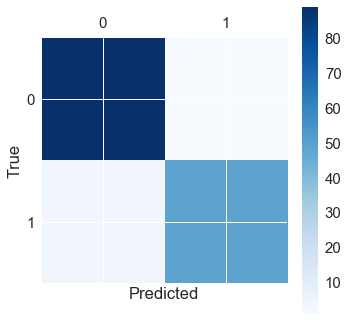


 Classification report 
              precision    recall  f1-score   support

          0       0.96      0.99      0.97        90
          1       0.98      0.92      0.95        53

avg / total       0.97      0.97      0.96       143

#############################################################################


In [46]:
# Support Vector Classificatio(SVC)
# fitting the SVC model on the training data and predicting for test data
#Radial Basis Function is a commonly used kernel
# gamma is a parameter of the RBF kernel and can be thought of as the 'spread' of the kernel and 
#therefore the decision region. When gamma is low, the 'curve' of the decision boundary is 
#very low and thus the decision region is very broad. 
#When gamma is high, the 'curve' of the decision boundary is high, 
#which creates islands of decision-boundaries around data points. We will see this very clearly below.
#C is a parameter of the SVC learner and is the penalty for misclassifying a data point. 
#When C is small, the classifier is okay with misclassified data points (high bias, low variance). 
#When C is large, the classifier is heavily penalized for misclassified data and therefore bends over 
#backwards avoid any misclassified data points (low bias, high variance).
from sklearn.svm import SVC
svc=SVC(C=100,gamma=0.001,kernel='rbf',probability=True) 
svc.fit(X_train, y_train)
y_pred_svc =svc.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_svc)
print('SVC:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Blues)
print('Confusion matrix plot of SVC')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_svc))
print ('#############################################################################')


Conclusion: I do the feature analysis and show that there are some features with strong colinearity. The observations
were confirmed by the PCA analysis,for example, concave.ponts_worst,concavity_worst, concavity_mean, perimeter_worst, area_worst, radius_worst,perimeter_mean, area_mean, radius_mean. After remove these nulticolinerity, we were able to predict with high accuracy the malignant and benign tumors using different models. As results show, both SVC and logistic regression are performing equally good. 